In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress



In [2]:
csv_path = '../Resources/crime_df.csv'
crime_df = pd.read_csv(csv_path)
crime_df["Zip Code"] = crime_df['Zip Code'].astype(float)

In [3]:
crime_df.head()

Unnamed: 0                  Offense Type          Offense Category  \
0           0  weapon-unlawful-discharge-of          all-other-crimes   
1           1                   theft-other                   larceny   
2           2      theft-items-from-vehicle  theft-from-motor-vehicle   
3           3                   theft-other                   larceny   
4           4                theft-shoplift                   larceny   

           Reported Date  Zip Code  
0  6/15/2016 11:31:00 PM   80239.0  
1   1/29/2018 5:53:00 PM   80239.0  
2   4/26/2016 9:02:00 PM   80210.0  
3  1/30/2018 10:29:00 PM   80246.0  
4   6/23/2017 4:09:00 PM   80206.0

In [4]:
csv_zip = '../Resources/25 Final Zip Codes.csv'
ziplist = pd.read_csv(csv_zip)

ziplist1 = ziplist['zip'].tolist()
ziplist1

[80002,
 80003,
 80004,
 80005,
 80031,
 80033,
 80110,
 80123,
 80127,
 80128,
 80204,
 80211,
 80212,
 80214,
 80215,
 80219,
 80221,
 80226,
 80227,
 80228,
 80232,
 80236,
 80401,
 80454,
 80465]

In [5]:
crime_df['Offense Category'].unique()

array(['all-other-crimes', 'larceny', 'theft-from-motor-vehicle',
       'drug-alcohol', 'auto-theft', 'white-collar-crime', 'burglary',
       'public-disorder', 'aggravated-assault',
       'other-crimes-against-persons', 'robbery', 'sexual-assault',
       'murder', 'arson'], dtype=object)

In [6]:
finalzip = [80401,80211,80002,80204,80212]
# crime_filter = crime_df.loc[crime_df['Zip Code'].isin(finalzip)]
# crime_filter = crime_filter.groupby('Zip Code')

violent = crime_df.loc[(crime_df['Offense Category'] == 'aggravated assault')| (crime_df['Offense Category'] == 'murder')|
                          (crime_df['Offense Category'] == 'robbery') | (crime_df['Offense Category'] == 'sexual-assault')|
                          (crime_df['Offense Category'] == 'arson')]
violent_filter = violent.loc[violent['Zip Code'].isin(finalzip)]
violent_group = violent_filter.groupby('Zip Code').count()
violent_group = violent_group.reset_index()

In [7]:
violent_lib = {'Zip Code': violent_group['Zip Code'].tolist(), "Violent Crimes 2016-2019": violent_group['Reported Date'].tolist()}
violent_crimes = pd.DataFrame(violent_lib)
# violent_crimes.to_csv('Resources/violent_crime_final_zips.csv')

In [8]:
nonviolent = crime_df.loc[(crime_df['Offense Category'] == 'all-other-crimes')|(crime_df['Offense Category'] == 'larceny')|
                         (crime_df['Offense Category'] == 'theft-from-motor-vehicle')|(crime_df['Offense Category'] == 'auto-theft')|
                         (crime_df['Offense Category'] == 'drug-alcohol')| (crime_df['Offense Category'] == 'white-collar-crime')|
                         (crime_df['Offense Category'] == 'burglary')|(crime_df['Offense Category'] == 'public-disorder')|(crime_df['Offense Category'] == 'other-crimes-against-persons')]
nonviolent_filter = nonviolent.loc[nonviolent['Zip Code'].isin(finalzip)]
nonviolent_group = nonviolent_filter.groupby('Zip Code').count()
nonviolent_group = nonviolent_group.reset_index()


In [9]:
nonviolent_lib = {"Zip Code" : nonviolent_group['Zip Code'].tolist(), "Non-Violent Crimes 2016-2019" : nonviolent_group['Reported Date'].tolist()}
nonviolent_crimes = pd.DataFrame(nonviolent_lib)
#nonviolent_crimes.to_csv('../Resources/nonviolent_crime_final_zips.csv')

In [10]:
violent_crimes_zeroes = pd.DataFrame([[80401,0],[80002,0]],columns=['Zip Code','Violent Crimes 2016-2019'])
violent_crimes = violent_crimes.append(violent_crimes_zeroes,ignore_index=True)
violent_crimes

Zip Code  Violent Crimes 2016-2019
0   80204.0                       328
1   80211.0                       286
2   80212.0                       124
3   80401.0                         0
4   80002.0                         0

In [11]:
nonviolent_crimes_zeroes = pd.DataFrame([[80002,0]],columns=['Zip Code','Non-Violent Crimes 2016-2019'])
nonviolent_crimes = nonviolent_crimes.append(nonviolent_crimes_zeroes,ignore_index=True)
nonviolent_crimes

Zip Code  Non-Violent Crimes 2016-2019
0   80204.0                         14438
1   80211.0                         14603
2   80212.0                          6888
3   80401.0                           494
4   80002.0                             0

In [12]:
all_crimes = pd.merge(violent_crimes,nonviolent_crimes,on='Zip Code')

In [13]:
all_crimes['Total Crimes'] = all_crimes['Violent Crimes 2016-2019'] + all_crimes['Non-Violent Crimes 2016-2019']
all_crimes['Percent Violent'] = all_crimes['Violent Crimes 2016-2019'] / all_crimes['Total Crimes'] * 100
all_crimes=all_crimes.fillna(0)
all_crimes

Zip Code  Violent Crimes 2016-2019  Non-Violent Crimes 2016-2019  \
0   80204.0                       328                         14438   
1   80211.0                       286                         14603   
2   80212.0                       124                          6888   
3   80401.0                         0                           494   
4   80002.0                         0                             0   

   Total Crimes  Percent Violent  
0         14766         2.221319  
1         14889         1.920881  
2          7012         1.768397  
3           494         0.000000  
4             0         0.000000

In [14]:
# Add in population per zip code
#Import zipcode key csv file
zip_code_csv = "../Resources/zip_code_database.csv"
#Create Original DataFrame, replace na with blank stings
zip_code_df = pd.read_csv(zip_code_csv)
zip_code_df = zip_code_df.replace(np.nan, '', regex=True)
#Filter on just zip codes from finalzip list
zip_code_pop = zip_code_df.loc[zip_code_df["zip"].isin(finalzip)]
zip_code_pop = zip_code_pop[["zip","irs_estimated_population_2015"]].reset_index(drop=True)
zip_code_pop.columns = ['Zip Code','Population']

In [15]:
all_crimes = pd.merge(all_crimes,zip_code_pop,on='Zip Code')

In [16]:
# per capita calculations
all_crimes['Violent Crimes per Capita'] = all_crimes['Violent Crimes 2016-2019'] / all_crimes['Population']
all_crimes['Non-Violent Crimes per Capita'] = all_crimes['Non-Violent Crimes 2016-2019'] / all_crimes['Population']
all_crimes['Total Crimes per Capita'] = all_crimes['Total Crimes'] / all_crimes['Population']


In [17]:
# formatting
all_crimes['Violent Crimes per Capita'] = all_crimes['Violent Crimes per Capita'].map("{:.3f}".format)
all_crimes['Non-Violent Crimes per Capita'] = all_crimes['Non-Violent Crimes per Capita'].map("{:.3f}".format)
all_crimes['Total Crimes per Capita'] = all_crimes['Total Crimes per Capita'].map("{:.3f}".format)
all_crimes['Percent Violent'] = all_crimes['Percent Violent'].map("{:.2f}%".format)

In [18]:
all_crimes['Zip Code'] = all_crimes['Zip Code'].astype(int).round(0)
all_crimes

Zip Code  Violent Crimes 2016-2019  Non-Violent Crimes 2016-2019  \
0     80204                       328                         14438   
1     80211                       286                         14603   
2     80212                       124                          6888   
3     80401                         0                           494   
4     80002                         0                             0   

   Total Crimes Percent Violent  Population Violent Crimes per Capita  \
0         14766           2.22%       26530                     0.012   
1         14889           1.92%       30010                     0.010   
2          7012           1.77%       16670                     0.007   
3           494           0.00%       34050                     0.000   
4             0           0.00%       17140                     0.000   

  Non-Violent Crimes per Capita Total Crimes per Capita  
0                         0.544                   0.557  
1                         0.487                   0.496  
2                         0.413                   0.421  
3                         0.015                   0.015  
4                         0.000                   0.000

In [20]:
all_crimes.to_csv('../Resources/all_crimes.csv',index=False)

In [27]:
# Creating bar chart of crimer per capita
all_crimes['Zip Code'] = all_crimes['Zip Code'].astype(str)
all_crimes['Total Crimes per 1000 Residents'] = all_crimes['Total Crimes'] /all_crimes['Population'] * 1000

crimes = all_crimes['Total Crimes per 1000 Residents']
crime_axis = all_crimes['Zip Code']

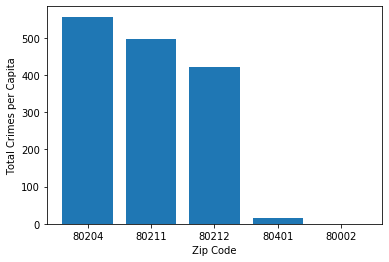

In [28]:
plt.bar(crime_axis,crimes)
plt.xlabel('Zip Code')
plt.ylabel('Total Crimes per Capita')
plt.show()

In [105]:
# Incorporate Mark Score
# Original score calculated with price per sq ft, variance, walk score, and restaurant ratings
# this got the zip codes from 25 down to 5, and will not incorporate crime to find a final Mark Score 
# All we need is the score and zip codes, using the mark_score_loc csv to pull it in
mark_score_loc = pd.read_csv('../Resources/mark_score_loc.csv')
mark_score_loc

Unnamed: 0    Zip    lat     lng  Mark Score
0            8  80123  39.62 -105.07        5.14
1            9  80127  39.57 -105.14        8.77
2           10  80236  39.65 -105.04       21.70
3           11  80227  39.67 -105.09       26.13
4           12  80033  39.77 -105.09       52.55
5           13  80215  39.74 -105.12       53.10
6           14  80003  39.83 -105.06       58.24
7           15  80110  39.64 -104.99       79.28
8           16  80221  39.82 -105.01       94.81
9           17  80226  39.71 -105.09      100.27
10          18  80214  39.74 -105.07      101.02
11          19  80219  39.70 -105.04      105.69
12          20  80212  39.77 -105.05      120.06
13          21  80204  39.73 -105.02      121.16
14          22  80002  39.79 -105.11      144.80
15          23  80211  39.77 -105.02      164.53
16          24  80401  39.73 -105.21      212.79

In [156]:
# pare down the mark score dataframe
mark_score_final = mark_score_loc[['Zip','Mark Score']]
mark_score_final = mark_score_final.loc[mark_score_final["Zip"].isin(finalzip)].reset_index(drop=True)
mark_score_final.columns = ['Zip Code','Mark Score']

In [157]:
# merge the data frames
mark_score_final = pd.merge(mark_score_final,all_crimes,on='Zip Code')

In [158]:
# further pare down the final dataframe
mark_score_final = mark_score_final[['Zip Code','Mark Score','Total Crimes per Capita']]

In [159]:
mark_score_final['Total Crimes per Capita'] = pd.to_numeric(mark_score_final['Total Crimes per Capita'])

In [160]:
# set weight and factor for total crimes per capita and integrate into the Mark Score
# crimes has a negative effect, therefor it will subtract from the Mark Score
# original variable factors and weights are below for reference
cpc_wt = (0.15)
cpc_factor = (-500)
CPC = []
final_score = []

# # create a formula based on values in summary dataframe
# # formula will include weighting of variables and can then have the highest value be the "best" zip code
# # Mark Score = Avg price/sq ft * APSF_wt + Variance * Var_wt + Walkscore * WS_wt + Avg Rest Rating * ARR_wt + Crimescore * CS_wt
# apsf_wt = 1
# var_wt = 2.5
# ws_wt = 0.5
# arr_wt = 0.2
# # factors are to get the data within the same range
# # average price per square foot is negative because we want the lowest value
# apsf_factor = -1
# var_factor = 0.01
# ws_factor = 5
# arr_factor = 100

In [161]:
# adding in crime into the original mark score due to limitations in data for original 25 zip codes
# could not incorporate crime until after the top 5 were chosen, but will be used for final considerations
for i in range(0,5):
    CPC.append(mark_score_final.iloc[i,2]*cpc_wt*cpc_factor)
    final_score.append(mark_score_final['Mark Score'][i] + CPC[i])
mark_score_final['Crime Score'] = CPC
mark_score_final['Final Mark Score'] = final_score

In [162]:
mark_score_final

Zip Code  Mark Score  Total Crimes per Capita  Crime Score  \
0     80212      120.06                    0.421      -31.575   
1     80204      121.16                    0.557      -41.775   
2     80002      144.80                    0.000       -0.000   
3     80211      164.53                    0.496      -37.200   
4     80401      212.79                    0.015       -1.125   

   Final Mark Score  
0            88.485  
1            79.385  
2           144.800  
3           127.330  
4           211.665

In [163]:
mark_score_final = mark_score_final[['Zip Code','Crime Score','Final Mark Score']]

mark_score_final.sort_values('Final Mark Score',ascending=False).reset_index(drop=True)


Zip Code  Crime Score  Final Mark Score
0     80401       -1.125           211.665
1     80002       -0.000           144.800
2     80211      -37.200           127.330
3     80212      -31.575            88.485
4     80204      -41.775            79.385

In [164]:
mark_score_final.to_csv('../Resources/mark_score_final.csv',index=False)